<a href="https://colab.research.google.com/github/sandychon/tools/blob/master/Inheritance_of_NCI_thesaurus_codes_in_NCI_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook creates a graph representing the inheritence hierarchy of the disease nodes (both TREE and TRIAL) for a given study in the cancer.gov API

Author: Hubert Hickman
hubert.hickman@nih.gov

In the form below, enter the NCT code of a study of interest and indicate if you wish to download the graph as a png file when it has been generated.

Once you have set the input values, select the 'Run all' option from the Runtime menu above to kick things off once you have set the input parameters.

Green nodes are TRIAL disease.  Yellow nodes are TREE nodes.  Large nodes are denoted as ```maintype``` in the API.




In [0]:
#@title
%%bash
apt-get -qq install graphviz  > /dev/null 2>&1
apt-get -qq install libgraphviz-dev  > /dev/null 2>&1

In [0]:
#@title
%%bash
pip -q install pydot  > /dev/null 2>&1
pip -q install sphinx  > /dev/null 2>&1
pip -q install graphviz  > /dev/null 2>&1
pip -q install pygraphviz  > /dev/null 2>&1



In [0]:
#@title Enter the NCT code of a study of interest (e.g. NCT04114981)
trial_of_interest = 'NCT03775265' #@param {type:"string"}
download_graph = False #@param {type:"boolean"}

In [0]:
#@title

import requests
import sys
import pprint
import pickle
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import networkx.drawing
import graphviz
from networkx.drawing.nx_agraph import graphviz_layout
from google.colab import files
import ipywidgets as widgets
import IPython.display 

In [0]:
#@title

r = requests.post('https://clinicaltrialsapi.cancer.gov/v1/clinical-trials',
                 data={'nct_id':[trial_of_interest]})
j = r.json()


In [0]:
#@title
G = nx.DiGraph()
trial = j['trials'][0]
codes=[]
codeLabelDict = {}
colorDict = {}
sizeDict = {}
for d in trial['diseases']:
        colorDict[d['nci_thesaurus_concept_id']] = 'yellow'

for d in trial['diseases']:
    codes.append(d['preferred_name'] +  '(' + d['nci_thesaurus_concept_id'] + ')')
    if d['inclusion_indicator'] == 'TRIAL':
        colorDict[d['nci_thesaurus_concept_id']] = 'green'
    
    if len(d['type']) > 0 and d['type'][0] == 'maintype':
        sizeDict[d['nci_thesaurus_concept_id']] = 1200
    else:
        sizeDict[d['nci_thesaurus_concept_id']] = 300
    codeLabelDict[d['nci_thesaurus_concept_id']] =d['preferred_name'] +  '\n' + d['nci_thesaurus_concept_id'] 
    G.add_node(d['nci_thesaurus_concept_id'])


In [0]:
#@title
for d in trial['diseases']:
    child = d['nci_thesaurus_concept_id']
    for p in d['parents']:
        G.add_edge(p, child)

colorlist=[]
sizelist = []
for node in G:
    colorlist.append(colorDict[node])
    sizelist.append(sizeDict[node])


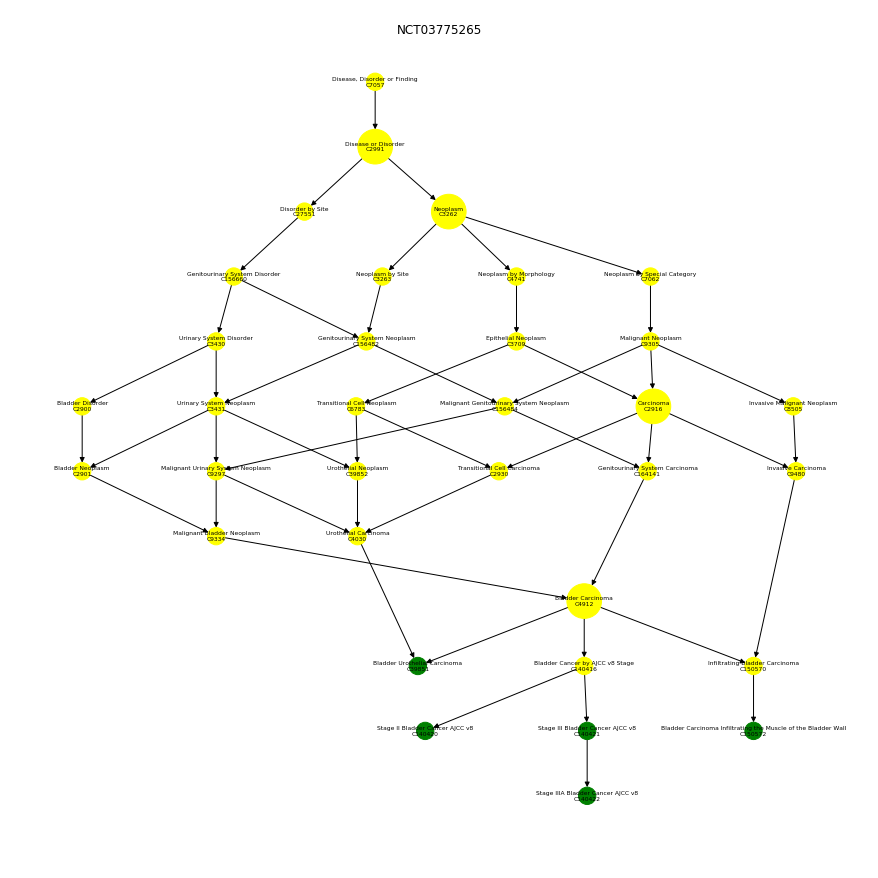

In [0]:
#@title
%matplotlib inline
pos=graphviz_layout(G, prog='dot')

nx.draw(G, pos, with_labels=True,  font_size=6
   , labels=codeLabelDict
        , node_color=colorlist, node_size=sizelist )
fig=plt.gcf()


fig.set_size_inches(12, 12)
fig.suptitle(trial_of_interest)
plt.title=trial_of_interest
plt.savefig(trial_of_interest+'.pdf', dpi=300, format='pdf')
plt.show()

if download_graph:
  files.download(trial_of_interest+'.pdf')
